<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/5_data_analysis_processing/2_data_cleaning.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/5_data_analysis_processing/2_data_cleaning.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Data Cleaning

Data cleaning is a vital part of a machine learning project where you need to identify and deal with all mistakes and errors in your dataset.
> Knowing how to properly clean and assemble your data will set you miles apart from others in your ﬁeld.
For this purpose, you might need to use different methods and visualization techniques which are discussed here.

This notebook will cover the following topics:

- [1. Import packages and dataset](#import)
- [2. Initial general assessment](#general)
    - [Rows with duplicated data](#duplicated)
    - [Columns with a single value](#single)
- [3. Outliers](#outlier)
    - [Standard deviation method](#std)
    - [Interquartile range method](#iqr)
- [4. Missing data](#missing)
    - [Remove rows with missing values](#remove_missing)
    - [Filling missing values](#fill_missing)

<a id='import'></a>
## 1. Import packages and dataset

In [260]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

In [261]:
house = pd.read_csv('../data/all_Cities.csv')
titanic = pd.read_csv('../data/titanic_train.csv')

iris = datasets.load_iris(as_frame=True)
iris = iris.frame

In [262]:
house.head(2)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad


In [263]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<a id='general'></a>
## 2. Basic data cleaning

<a id='duplicated'></a>
### 2.1 Rows with duplicated data

We can find the duplicated samples in the data using 

`
DataFrame.duplicated()
`

If we need to know how many samples are duplicated, we need to get the summation of previous line of code.

In [264]:
house.duplicated().sum()

85398

In [265]:
titanic.duplicated().sum()

0

The duplicated samples can be removed using 

`
DataFrame.drop_duplicates()
`

In [266]:
house.drop_duplicates(inplace=True, # To be performed in place
                      ignore_index=True  # To reset the index
                      )

In [267]:
house.duplicated().sum()

0

<a id='single'></a>
### 2.2 Columns with a single value

Columns that have only one value are probably useless and should be removed. This predictor is showing zero variation and it's called *zero-variance predictor*.

So, it's a good practice to check the number of unique values for each feature.

In [268]:
house.nunique()

seller_type         3
bedroom            14
layout_type         2
property_type       6
locality         4146
price            1856
area             2765
furnish_type        3
bathroom           16
city                8
dtype: int64

In [269]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Although here there is no column with a single value, we can easily delete the columns with a single value as follows

In [270]:
count = titanic.nunique()
to_del = [i for i,v in enumerate(count) if v == 1]

titanic.drop(to_del, axis=1, inplace=True)

<a id='outlier'></a>
## 3. Outliers

Sometimes data has some samples with extreme values that are unexpected and unlike the data. These samples are called outliers and need specific care.

> Even with a thorough understanding of the data, outliers can be hard to deﬁne.

>Great care should be taken not to hastily remove or change values, especially if the sample size is small.

> Identifying outliers and bad data in your dataset is probably one of the most diﬃcult parts of data cleanup, and it takes time to get right. Even if you have a deep understanding of statistics and how outliers might aﬀect your data, it’s always a topic to explore cautiously.

<a id='std'></a>
### 3.1 Standard deviation method

If the distribution of data is Gaussian or Gaussian-like, the standard deviation method is a good candidate for identifying the outliers.
<center>
<img src='./img/std.png' width='400px'>
</center>

A sample that falls out of 3 standard deviations is unlikely and probably an outlier.

> Data values that have a z-score sigma greater than a threshold, for example, of three, are declared to be outliers.

$
Z = \frac{x - \mu}{\sigma}
$

In [271]:
mean = titanic['Fare'].mean()
std  = titanic['Fare'].std()
print('Mean: ', mean)
print('std: ', std)

# Calculate the limits
lower_lim = mean - 3 * std
upper_lim = mean + 3 * std


Mean:  32.204207968574636
std:  49.6934285971809


In [272]:
# Identify the outliers

outliers = titanic.loc[(titanic['Fare'] < lower_lim) | (titanic['Fare'] >upper_lim), 'Fare']

print('number of outliers:', len(outliers))

# outliers

number of outliers: 20


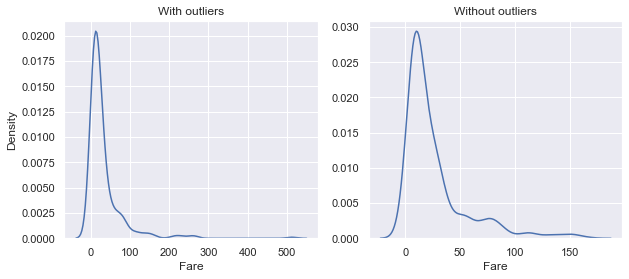

In [273]:
df1 = titanic.loc[(titanic['Fare'] > lower_lim) & (titanic['Fare'] < upper_lim), 'Fare']

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax = sns.kdeplot(titanic['Fare'])
ax.set_title('With outliers')
ax.set_xlabel('Fare')

ax = fig.add_subplot(122)
ax = sns.kdeplot(df1)
ax.set_ylabel('')
ax.set_title('Without outliers');


<a id='iqr'></a>
### 3.2 Interquartile range method

If the data is not following the Gaussian distribution, interquartile range (IQR) is a good method to identify the outliers.

IQR is the difference between the 25th and 75th percentile of the data.

```

     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
outlier           <----------->            outliers
                       IQR

```

In [274]:
q1 = house['price'].describe()['25%']
q3 = house['price'].describe()['75%']

iqr = q3 - q1

lower_lim = q1 - 1.5 * iqr 
upper_lim = q3 + 1.5 * iqr 

In [275]:
df1 = house.loc[(house['price'] > lower_lim) & (house['price'] < upper_lim), 'price']

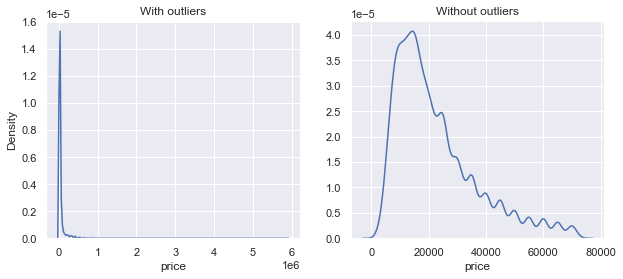

In [276]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax = sns.kdeplot(house['price'])
ax.set_title('With outliers')
ax.set_xlabel('price')

ax = fig.add_subplot(122)
ax = sns.kdeplot(df1)
ax.set_ylabel('')
ax.set_title('Without outliers');

<div class="alert alert-block alert-danger">
<b>Note:</b> The goal here is to be aware of the methods. In a real project, I would analyze the outliers based on other variables, for example, I would compare the price of houses within each city with the same number of bedrooms.
</div>

<a id='missing'></a>
## 4. Missing data

Dataset is usually messy with lots of missing values which can be because of a mistake in observation or corruption in the data.
On the other hand, most of machine learning algorithms don't work with missing values. 
So, lots of effort should be made to handle the missing values.

First, we need to know about the number of missing values in the dataframe.

```Python
df.isna().sum().sort_values(ascending=False)
```

In [277]:
titanic.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<a id='remove_missing'></a>
### 4.1 Remove rows with missing values

>The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values.

That can be done if we have a big dataset where removing few samples doesn't affect the result significantly. As we want to learn how to perform these methods, here I use this method.


In [279]:
'''
I create a copy of dataframe to remove some samples from it 
instead of the original dataframe
'''
titanic_df = titanic.copy()
titanic_df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

We can drop all missing values using `dropna()`

In [281]:
titanic_df.dropna(inplace=True)
titanic_df.isna().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [284]:
print('Before dropping: ', titanic.shape)
print('After dropping: ', titanic_df.shape)

Before dropping:  (891, 12)
After dropping:  (183, 12)


In this way, we lost 708 samples!!!

<a id='fill_missing'></a>
### 4.2 Filling missing values

We can fill the missing values using another value.
`df.fillna()`

In [289]:
titanic_df = titanic.copy()
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

titanic_df.isna().sum().sort_values(ascending=False)



Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

We can use different methods for filling the missing values (`‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None`) which are explained [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [296]:
titanic_df = titanic.copy()
titanic_df.fillna(method='ffill', inplace=True)

titanic_df.isna().sum().sort_values(ascending=False)

Cabin          1
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As we chose to fill the missing values with `'ffill'`, Python fill the missing values with the value of their previous sample. As there is a missing value for the first sample, `'ffill'` method can't fill the dataset completely.

In [300]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### [TOP ☝️](#top)